# Klasifikasi pada Dataset Fish Market & EDA

Klasifikasi dilakukan dengan menggunakan Logistic Regression, Random Forest, K-Nearest Neighbour, Naive Bayes, dan Support Vector Machine. Pemodelan dilakukan dengan membagi dataset ke dalam 80% subset pelatihan dan 20% subset pengujian. Evaluasi model dilakukan dengan menggunakan metrik akurasi, presisi, recall, dan f1-score.

# library yang digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# dataset

Dataset Fish Market memuat 159 pengamatan dengan 6 variabel bebas dan 1 variabel terikat. Variabel terikat pada dataset ini memiliki 7 kategori, yaitu Bream, Roach, Whitefish, Parkki, Perch, Pike, dan Smelt.

In [2]:
#memuat dataset

df = pd.read_csv("/kaggle/input/fish-market/Fish.csv")

# exploratory data analysis

In [3]:
#menampilkan 5 pengamatan pertama dari dataset

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#menampilkan 5 pengamatan terakhir dari dataset

df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
#mendeteksi jumlah data duplikat

df.duplicated().sum()

0

> interpretasi: dataset tidak memiliki data duplikat

In [6]:
#mendeteksi jumlah nilai yang hilang pada dataset

df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

> interpretasi: dataset tidak memiliki nilai yang hilang

In [7]:
#mengetahui tipe data dari masing-masing variabel

df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

> interpretasi: variabel species memiliki tipe data kategoorik dan variabel lainnya memiliki tipe data numerik

In [8]:
#memisahkan data numerik dan kategorik

cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
num_cols = df.select_dtypes(include = np.number).columns.tolist()

print('Categorical Variables: ', cat_cols)
print('Numerical Variables: ', num_cols)

Categorical Variables:  ['Species']
Numerical Variables:  ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [9]:
#menampilkan nilai unik dari variabel Species

df['Species'].unique().tolist()

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [10]:
#menampilkan jumlah data pada tiap kategori dari variabel Species

df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [11]:
#menampilkan statistik deskriptif dari dataset

df[num_cols].describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


> interpretasi:

1. Variabel Weight memiliki nilai mean yang lebih besar daripada median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi miring kanan (positive skewness)

1. Variabel Length1 memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

1. Variabel Length2 memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

1. Variabel Length3 memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

1. Variabel Height memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

1. Variabel Width memiliki nilai mean yang hampir sama median/Q2/persentil ke-50/50% data di bawah titik ini sehingga variabel tersebut cenderung berdistribusi normal

<Axes: >

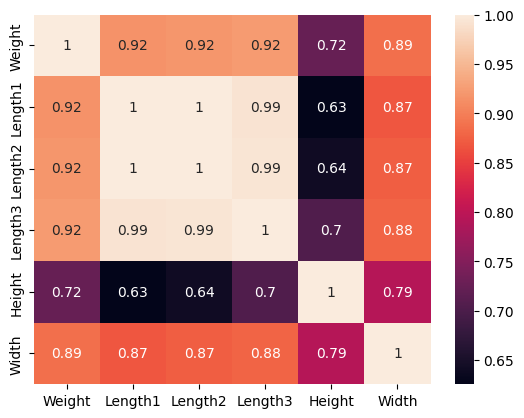

In [12]:
#menampilkan korelasi antar variabel

sns.heatmap(df[num_cols].corr(), annot = True)

> interpretasi:

1. Variabel Weight memiliki korelasi positif yang sangat tinggi dengan variabel Length1, Length2, Length3, dan Width, serta memiliki korelasi positif yang cukup tinggi dengan variabel Height

1. Variabel Length1 memiliki korelasi positif yang sangat tinggi dengan variabel Weight, Length2, Length3, dan Width, serta memiliki korelasi positif yang cukup tinggi dengan variabel Height

1. Variabel Length2 memiliki korelasi positif yang sangat tinggi dengan variabel Weight, Length1, Length3, dan Width, serta memiliki korelasi positif yang cukup tinggi dengan variabel Height

1. Variabel Length3 memiliki korelasi positif yang sangat tinggi dengan variabel Weight, Length1, Length2, dan Width, serta memiliki korelasi positif yang cukup tinggi dengan variabel Height

1. Variabel Height memiliki korelasi positif yang cukup tinggi dengan variabel Weight, Length1, Length2, Length3, dan Width

1. Variabel Width memiliki korelasi positif yang sangat tinggi dengan variabel Weight, Length1, Length2, dan Length3, serta memiliki korelasi positif yang cukup tinggi dengan variabel Height

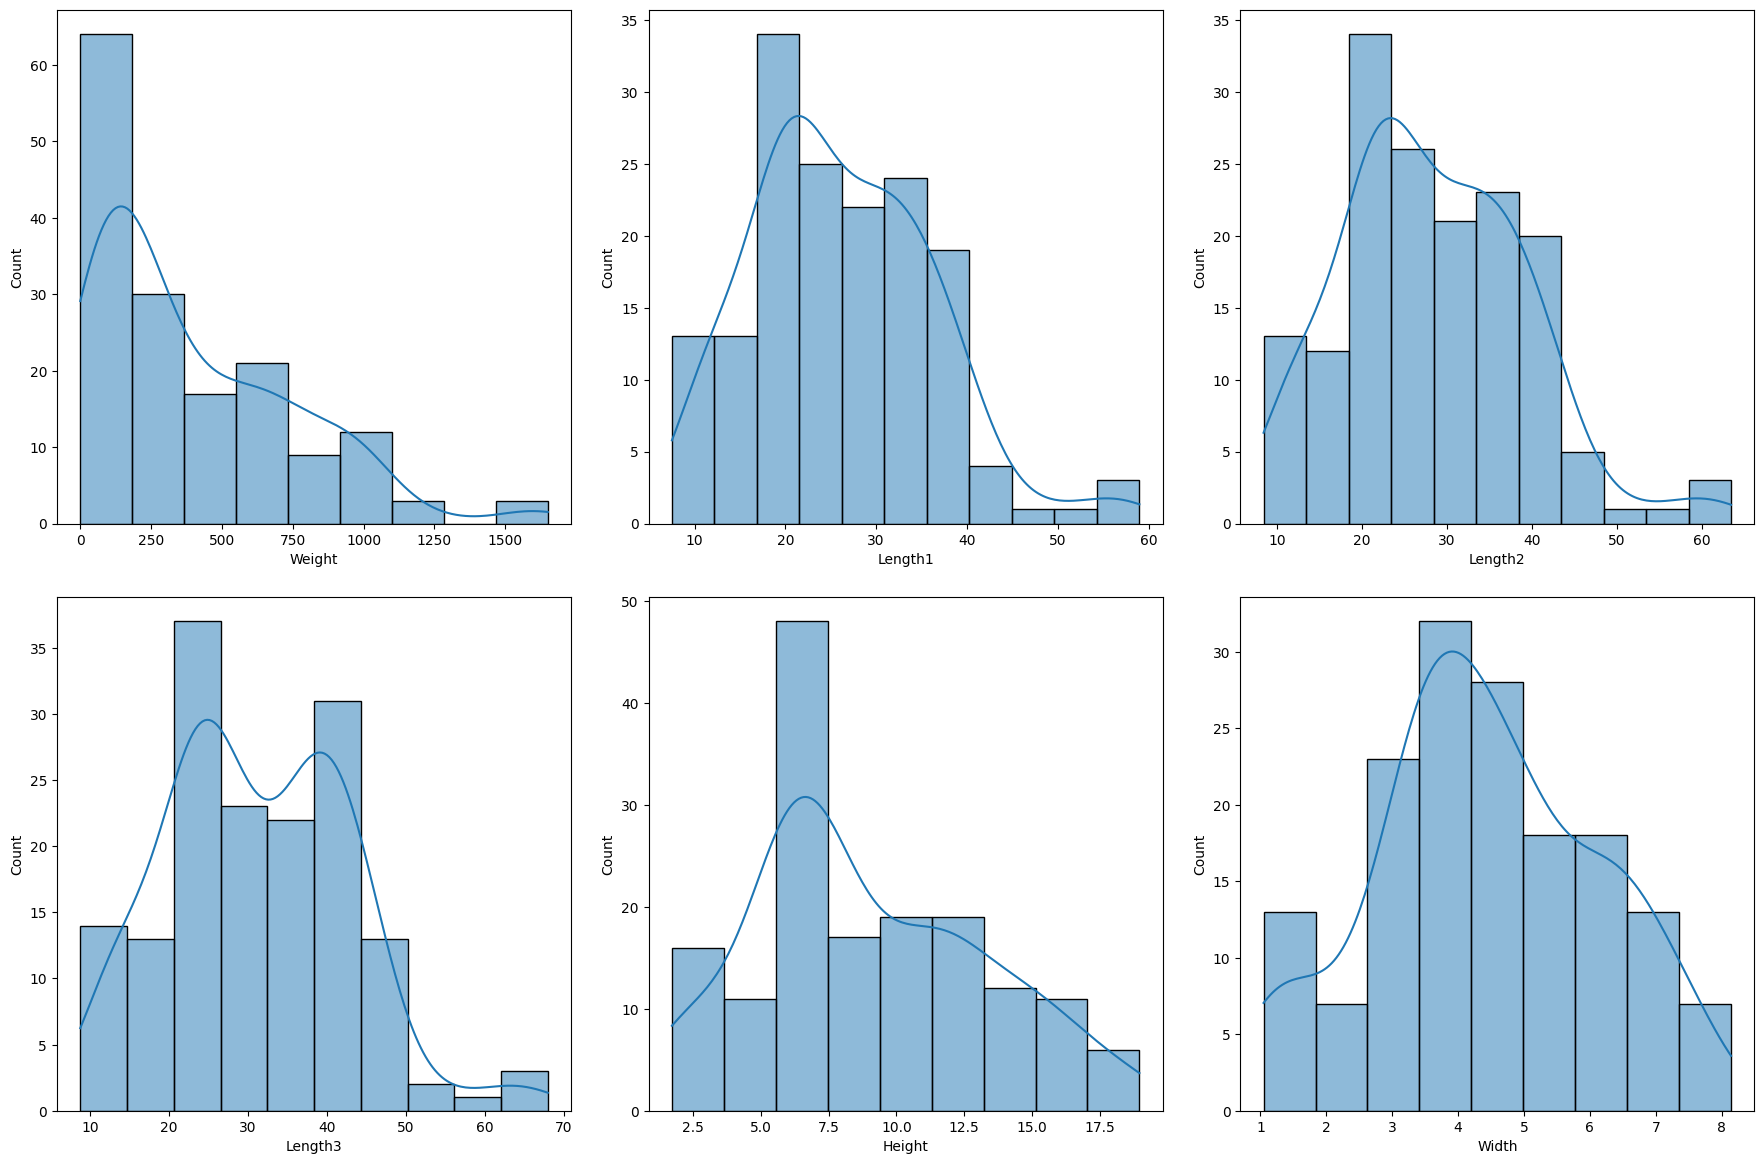

In [13]:
#menampilkan histogram dari dataset

fig = plt.figure(figsize = (18, 12))
for index, col in enumerate(df[num_cols]):
    plt.subplot(2, 3, index +1)
    sns.histplot(df[num_cols].loc[:, col], kde = True)
fig.tight_layout(pad = 2)

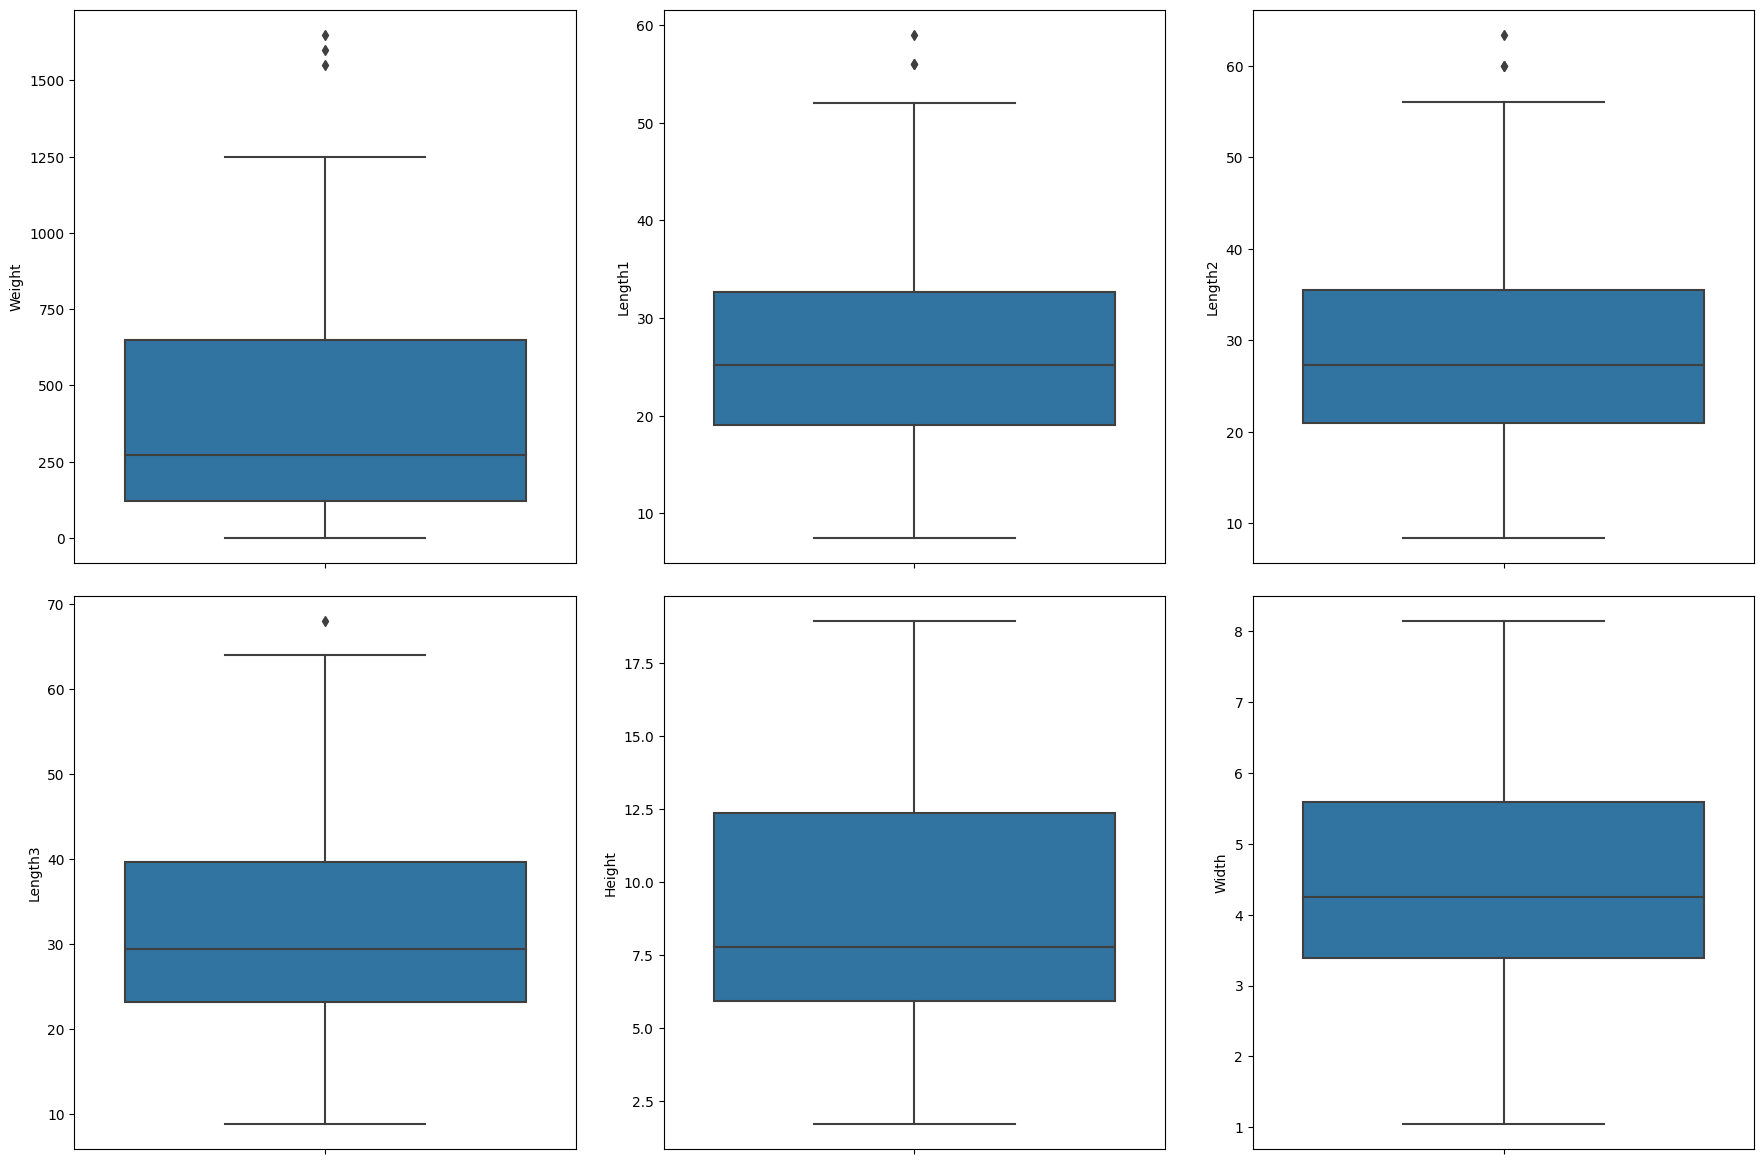

In [14]:
#menampilkan boxplot dari dataset

fig = plt.figure(figsize = (18, 12))
for index, col in enumerate(df[num_cols]):
    plt.subplot(2, 3, index +1)
    sns.boxplot(y = col, data = df)
fig.tight_layout(pad = 2)

> interpretasi:

1. Variabel Weight memiliki 3 outlier/pencilan

1. Variabel Length1 memiliki 2 outlier/pencilan

1. Variabel Length2 memiliki 2 outlier/pencilan

1. Variabel Length3 memiliki 1 outlier/pencilan

1. Variabel Height tidak memiliki outlier/pencilan

1. Variabel Width tidak memiliki outlier/pencilan

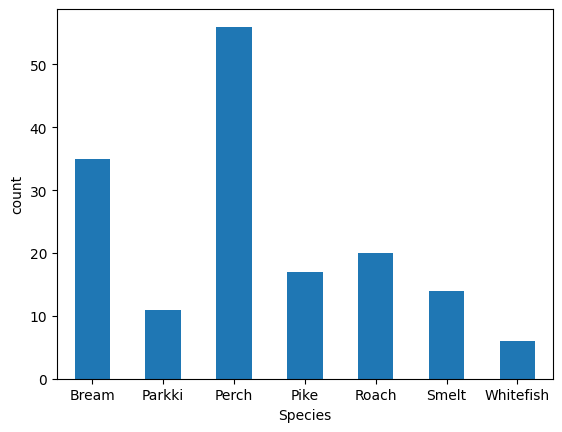

In [15]:
#menampilkan diagram batang dari variabel Species

df['Species'].value_counts().sort_index().plot(kind = 'bar', rot = 0, ylabel = 'count')
plt.show()

> interpretasi

Jumlah pengamatan pada dataset ini tidak seimbang atau imbalance karena perbedaan jumlah pengamatan pada kategori Perch jauh lebih tinggi daripada jumlah pengamatan pada kategori whitefish sehingga perlu dilakukan resampling

# data splitting

In [16]:
#memisahkan data ke dalam variabel bebas (X) dan variabel terikat (y)

X = df.drop(['Species'], axis = 1)
y = df['Species']

In [17]:
#mengatasi data imbalance dengan teknik oversampling

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

Species
Bream        56
Roach        56
Whitefish    56
Parkki       56
Perch        56
Pike         56
Smelt        56
Name: count, dtype: int64

In [18]:
#memisahkan data ke dalam subset pelatihan dan pengujian dengan perbandingan 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# normalisasi data

In [19]:
#normalisasi dataset menggunakan normalisasi standar

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# pemodelan

In [20]:
#Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
#Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
#K-Nearest Neighbour

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
#Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [24]:
#Support Vector Machine

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

# prediksi

In [25]:
#Logistic Regression

lr_pred = lr_model.predict(X_test)
lr_pred

array(['Roach', 'Bream', 'Whitefish', 'Whitefish', 'Whitefish', 'Pike',
       'Roach', 'Roach', 'Roach', 'Smelt', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Whitefish', 'Bream', 'Whitefish', 'Smelt', 'Bream',
       'Bream', 'Smelt', 'Pike', 'Whitefish', 'Pike', 'Bream', 'Roach',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Pike', 'Pike', 'Parkki',
       'Whitefish', 'Parkki', 'Parkki', 'Bream', 'Pike', 'Whitefish',
       'Bream', 'Pike', 'Parkki', 'Whitefish', 'Whitefish', 'Roach',
       'Bream', 'Perch', 'Whitefish', 'Parkki', 'Roach', 'Parkki', 'Pike',
       'Smelt', 'Whitefish', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Pike', 'Whitefish', 'Parkki', 'Whitefish', 'Pike', 'Parkki',
       'Bream', 'Parkki', 'Bream', 'Whitefish', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Smelt', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki'],
      dtype=object)

In [26]:
#Random Forest

rf_pred = rf_model.predict(X_test)
rf_pred

array(['Roach', 'Bream', 'Whitefish', 'Perch', 'Whitefish', 'Pike',
       'Roach', 'Roach', 'Roach', 'Smelt', 'Perch', 'Smelt', 'Roach',
       'Parkki', 'Whitefish', 'Bream', 'Whitefish', 'Smelt', 'Bream',
       'Bream', 'Smelt', 'Pike', 'Perch', 'Pike', 'Bream', 'Roach',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Pike', 'Pike', 'Parkki',
       'Whitefish', 'Parkki', 'Parkki', 'Bream', 'Pike', 'Whitefish',
       'Bream', 'Pike', 'Parkki', 'Whitefish', 'Perch', 'Perch', 'Bream',
       'Whitefish', 'Whitefish', 'Parkki', 'Roach', 'Parkki', 'Pike',
       'Smelt', 'Whitefish', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Pike', 'Whitefish', 'Parkki', 'Whitefish', 'Pike', 'Parkki',
       'Bream', 'Parkki', 'Bream', 'Whitefish', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Smelt', 'Bream', 'Roach', 'Bream', 'Perch', 'Parkki'],
      dtype=object)

In [27]:
#K-Nearest Neighbour

knn_pred = knn_model.predict(X_test)
knn_pred

array(['Roach', 'Bream', 'Whitefish', 'Perch', 'Whitefish', 'Pike',
       'Roach', 'Roach', 'Roach', 'Smelt', 'Whitefish', 'Smelt', 'Roach',
       'Parkki', 'Whitefish', 'Bream', 'Whitefish', 'Smelt', 'Bream',
       'Bream', 'Smelt', 'Pike', 'Perch', 'Pike', 'Bream', 'Roach',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Pike', 'Pike', 'Parkki',
       'Whitefish', 'Parkki', 'Parkki', 'Bream', 'Pike', 'Whitefish',
       'Bream', 'Pike', 'Parkki', 'Whitefish', 'Perch', 'Perch', 'Bream',
       'Whitefish', 'Whitefish', 'Parkki', 'Roach', 'Parkki', 'Pike',
       'Smelt', 'Whitefish', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Pike', 'Whitefish', 'Parkki', 'Whitefish', 'Pike', 'Parkki',
       'Bream', 'Parkki', 'Bream', 'Roach', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Smelt', 'Bream', 'Roach', 'Bream', 'Perch', 'Parkki'],
      dtype=object)

In [28]:
#Naive Bayes

nb_pred = nb_model.predict(X_test)
nb_pred

array(['Roach', 'Bream', 'Bream', 'Bream', 'Whitefish', 'Pike', 'Roach',
       'Roach', 'Roach', 'Smelt', 'Roach', 'Smelt', 'Roach', 'Parkki',
       'Whitefish', 'Whitefish', 'Whitefish', 'Smelt', 'Bream', 'Bream',
       'Smelt', 'Pike', 'Pike', 'Perch', 'Bream', 'Roach', 'Parkki',
       'Parkki', 'Bream', 'Smelt', 'Perch', 'Pike', 'Parkki', 'Whitefish',
       'Parkki', 'Parkki', 'Bream', 'Perch', 'Bream', 'Bream', 'Pike',
       'Parkki', 'Pike', 'Pike', 'Roach', 'Bream', 'Whitefish',
       'Whitefish', 'Parkki', 'Roach', 'Parkki', 'Pike', 'Smelt',
       'Whitefish', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Perch',
       'Bream', 'Parkki', 'Whitefish', 'Pike', 'Parkki', 'Bream',
       'Parkki', 'Bream', 'Whitefish', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Smelt', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki'],
      dtype='<U9')

In [29]:
#Support Vector Machine

svm_pred = svm_model.predict(X_test)
svm_pred

array(['Roach', 'Bream', 'Whitefish', 'Perch', 'Whitefish', 'Pike',
       'Roach', 'Roach', 'Roach', 'Smelt', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Whitefish', 'Bream', 'Whitefish', 'Smelt', 'Bream',
       'Bream', 'Smelt', 'Pike', 'Perch', 'Pike', 'Bream', 'Roach',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Pike', 'Pike', 'Parkki',
       'Whitefish', 'Parkki', 'Parkki', 'Bream', 'Pike', 'Whitefish',
       'Bream', 'Pike', 'Parkki', 'Perch', 'Perch', 'Whitefish', 'Bream',
       'Whitefish', 'Whitefish', 'Parkki', 'Roach', 'Parkki', 'Pike',
       'Smelt', 'Whitefish', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Pike', 'Whitefish', 'Parkki', 'Whitefish', 'Pike', 'Parkki',
       'Bream', 'Parkki', 'Bream', 'Whitefish', 'Roach', 'Smelt', 'Roach',
       'Parkki', 'Smelt', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki'],
      dtype=object)

# confusion matrix

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

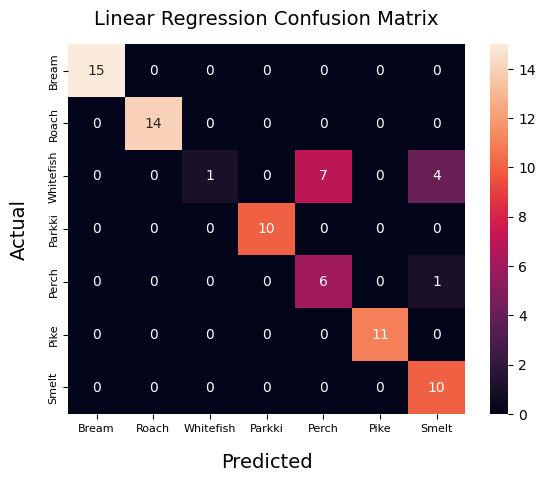

In [30]:
#Logistic Regression

lr_cm = confusion_matrix(y_test, lr_pred)
lr_hm = sns.heatmap(lr_cm, annot = True)
lr_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
lr_hm.xaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
lr_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
lr_hm.yaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
lr_hm.set_title("Linear Regression Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

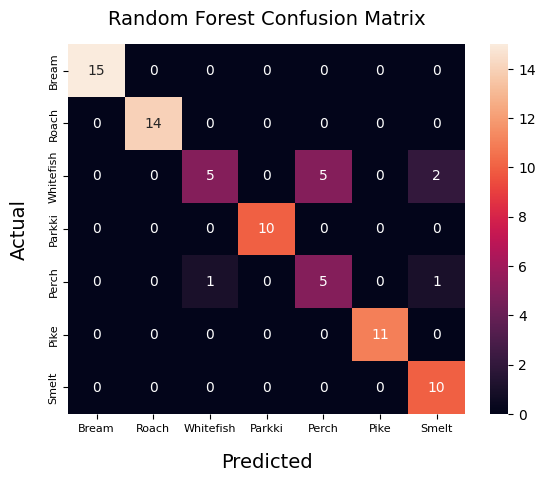

In [31]:
#Random Forest

rf_cm = confusion_matrix(y_test, rf_pred)
rf_hm = sns.heatmap(rf_cm, annot = True)
rf_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
rf_hm.xaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
rf_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
rf_hm.yaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
rf_hm.set_title("Random Forest Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'K-Nearest Neighbour Confusion Matrix')

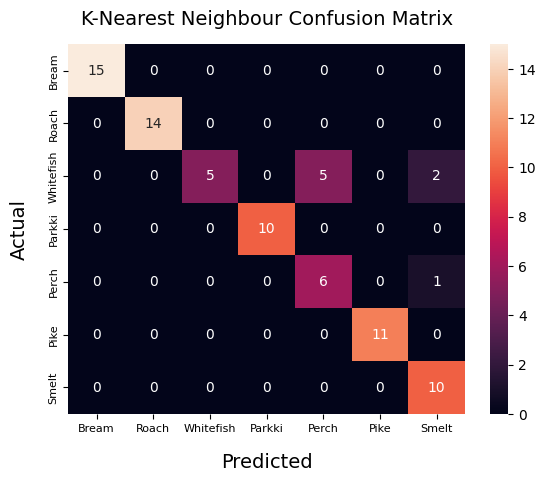

In [32]:
#K-Nearest Neighbour

knn_cm = confusion_matrix(y_test, knn_pred)
knn_hm = sns.heatmap(knn_cm, annot = True)
knn_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
knn_hm.xaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
knn_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
knn_hm.yaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
knn_hm.set_title("K-Nearest Neighbour Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

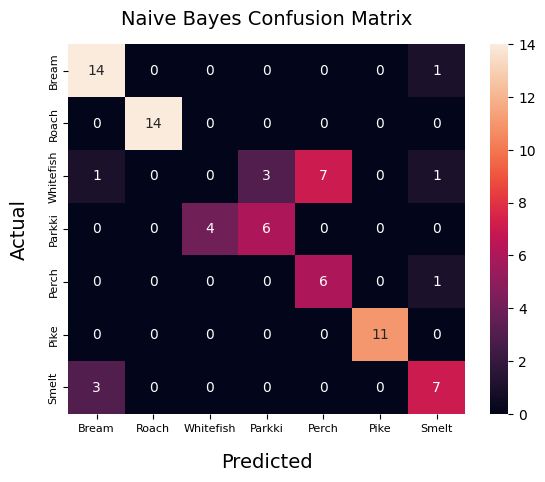

In [33]:
#Naive Bayes

nb_cm = confusion_matrix(y_test, nb_pred)
nb_hm = sns.heatmap(nb_cm, annot = True)
nb_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
nb_hm.xaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
nb_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
nb_hm.yaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
nb_hm.set_title("Naive Bayes Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

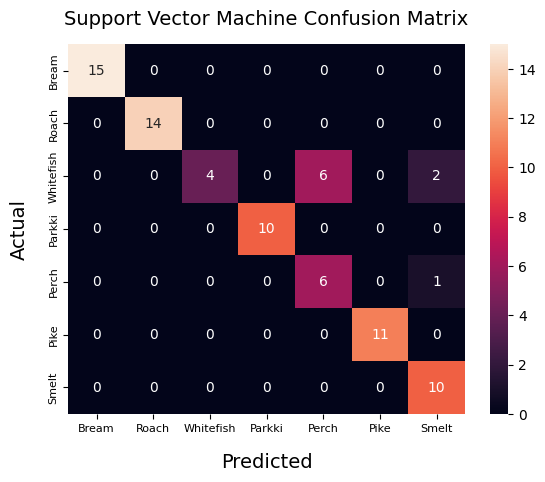

In [34]:
#Support Vector Machine

svm_cm = confusion_matrix(y_test, svm_pred)
svm_hm = sns.heatmap(svm_cm, annot = True)
svm_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
svm_hm.xaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
svm_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
svm_hm.yaxis.set_ticklabels(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], fontsize = 8)
svm_hm.set_title("Support Vector Machine Confusion Matrix", fontsize = 14, pad = 14)

# classification reports

In [35]:
#Logistic Regression

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        15
      Parkki       1.00      1.00      1.00        14
       Perch       1.00      0.08      0.15        12
        Pike       1.00      1.00      1.00        10
       Roach       0.46      0.86      0.60         7
       Smelt       1.00      1.00      1.00        11
   Whitefish       0.67      1.00      0.80        10

    accuracy                           0.85        79
   macro avg       0.88      0.85      0.79        79
weighted avg       0.91      0.85      0.81        79



> * interpretasi

1. precision

precision untuk kelas Bream adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Bream dengan benar

precision untuk kelas Parkki adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Parkki dengan benar

precision untuk kelas Perch adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Perch dengan benar

precision untuk kelas Pike adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Pike dengan benar

precision untuk kelas Roach adalah sebesar 0.46, artinya model dapat memprediksi 46% data pada kelas Pike dengan benar

precision untuk kelas Smelt adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Smelt dengan benar

precision untuk kelas Whitefish adalah sebesar 0.67, artinya model dapat memprediksi 67% data pada kelas Whitefish dengan benar

rata-rata precision adalah sebesar 0.88, artinya model dapat memprediksi rata-rata 88% data dengan benar

1. recall

recall untuk kelas Bream adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Bream

recall untuk kelas Parkki adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Parkki

recall untuk kelas Perch adalah sebesar 0.08, artinya model dapat menghasilkan 8% prediksi yang tepat pada kelas Perch

recall untuk kelas Pike adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Pike

recall untuk kelas Roach adalah sebesar 0.86, artinya model dapat menghasilkan 86% prediksi yang tepat pada kelas Roach

recall untuk kelas Smelt adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Smelt

recall untuk kelas Whitefish adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Whitefish

rata-rata recall adalah sebesar 0.85, artinya model dapat menghasilkan rata-rata 85% prediksi yang tepat

1. f1-score

f1-score untuk kelas Bream adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Bream adalah sebesar 100%

f1-score untuk kelas Parkki adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Parkki adalah sebesar 100%

f1-score untuk kelas Perch adalah sebesar 0.15, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Perch adalah sebesar 15%

f1-score untuk kelas Pike adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Pike adalah sebesar 100%

f1-score untuk kelas Roach adalah sebesar 0.6, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Roach adalah sebesar 60%

f1-score untuk kelas Smelt adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Smelt adalah sebesar 100%

f1-score untuk kelas Whitefish adalah sebesar 0.80, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Whitefish adalah sebesar 80%

rata-rata f1-score adalah sebesar 0.79, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 79%

1. accuracy

model memiliki akurasi sebesar 0.85, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 85%

In [36]:
#Random Forest

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        15
      Parkki       1.00      1.00      1.00        14
       Perch       0.83      0.42      0.56        12
        Pike       1.00      1.00      1.00        10
       Roach       0.50      0.71      0.59         7
       Smelt       1.00      1.00      1.00        11
   Whitefish       0.77      1.00      0.87        10

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.86        79
weighted avg       0.90      0.89      0.88        79



> * interpretasi

1. precision

precision untuk kelas Bream adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Bream dengan benar

precision untuk kelas Parkki adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Parkki dengan benar

precision untuk kelas Perch adalah sebesar 0.83, artinya model dapat memprediksi 83% data pada kelas Perch dengan benar

precision untuk kelas Pike adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Pike dengan benar

precision untuk kelas Roach adalah sebesar 0.50, artinya model dapat memprediksi 50% data pada kelas Pike dengan benar

precision untuk kelas Smelt adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Smelt dengan benar

precision untuk kelas Whitefish adalah sebesar 0.77, artinya model dapat memprediksi 77% data pada kelas Whitefish dengan benar

rata-rata precision adalah sebesar 0.87, artinya model dapat memprediksi rata-rata 87% data dengan benar

1. recall

recall untuk kelas Bream adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Bream

recall untuk kelas Parkki adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Parkki

recall untuk kelas Perch adalah sebesar 0.42, artinya model dapat menghasilkan 42% prediksi yang tepat pada kelas Perch

recall untuk kelas Pike adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Pike

recall untuk kelas Roach adalah sebesar 0.71, artinya model dapat menghasilkan 71% prediksi yang tepat pada kelas Roach

recall untuk kelas Smelt adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Smelt

recall untuk kelas Whitefish adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Whitefish

rata-rata recall adalah sebesar 0.88, artinya model dapat menghasilkan rata-rata 88% prediksi yang tepat

1. f1-score

f1-score untuk kelas Bream adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Bream adalah sebesar 100%

f1-score untuk kelas Parkki adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Parkki adalah sebesar 100%

f1-score untuk kelas Perch adalah sebesar 0.56, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Perch adalah sebesar 56%

f1-score untuk kelas Pike adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Pike adalah sebesar 100%

f1-score untuk kelas Roach adalah sebesar 0.59, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Roach adalah sebesar 59%

f1-score untuk kelas Smelt adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Smelt adalah sebesar 100%

f1-score untuk kelas Whitefish adalah sebesar 0.87, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Whitefish adalah sebesar 87%

rata-rata f1-score adalah sebesar 0.86, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 86%

1. accuracy

model memiliki akurasi sebesar 0.89, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 89%

In [37]:
#K-Nearest Neighbour

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        15
      Parkki       1.00      1.00      1.00        14
       Perch       1.00      0.42      0.59        12
        Pike       1.00      1.00      1.00        10
       Roach       0.55      0.86      0.67         7
       Smelt       1.00      1.00      1.00        11
   Whitefish       0.77      1.00      0.87        10

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.87        79
weighted avg       0.93      0.90      0.89        79



> * interpretasi

1. precision

precision untuk kelas Bream adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Bream dengan benar

precision untuk kelas Parkki adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Parkki dengan benar

precision untuk kelas Perch adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Perch dengan benar

precision untuk kelas Pike adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Pike dengan benar

precision untuk kelas Roach adalah sebesar 0.55, artinya model dapat memprediksi 55% data pada kelas Pike dengan benar

precision untuk kelas Smelt adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Smelt dengan benar

precision untuk kelas Whitefish adalah sebesar 0.77, artinya model dapat memprediksi 77% data pada kelas Whitefish dengan benar

rata-rata precision adalah sebesar 0.90, artinya model dapat memprediksi rata-rata 90% data dengan benar

1. recall

recall untuk kelas Bream adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Bream

recall untuk kelas Parkki adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Parkki

recall untuk kelas Perch adalah sebesar 0.42, artinya model dapat menghasilkan 42% prediksi yang tepat pada kelas Perch

recall untuk kelas Pike adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Pike

recall untuk kelas Roach adalah sebesar 0.86, artinya model dapat menghasilkan 86% prediksi yang tepat pada kelas Roach

recall untuk kelas Smelt adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Smelt

recall untuk kelas Whitefish adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Whitefish

rata-rata recall adalah sebesar 0.90, artinya model dapat menghasilkan rata-rata 90% prediksi yang tepat

1. f1-score

f1-score untuk kelas Bream adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Bream adalah sebesar 100%

f1-score untuk kelas Parkki adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Parkki adalah sebesar 100%

f1-score untuk kelas Perch adalah sebesar 0.59, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Perch adalah sebesar 59%

f1-score untuk kelas Pike adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Pike adalah sebesar 100%

f1-score untuk kelas Roach adalah sebesar 0.67, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Roach adalah sebesar 67%

f1-score untuk kelas Smelt adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Smelt adalah sebesar 100%

f1-score untuk kelas Whitefish adalah sebesar 0.87, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Whitefish adalah sebesar 87%

rata-rata f1-score adalah sebesar 0.87, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 87%

1. accuracy

model memiliki akurasi sebesar 0.90, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 90%

In [38]:
#Naive Bayes

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

       Bream       0.78      0.93      0.85        15
      Parkki       1.00      1.00      1.00        14
       Perch       0.00      0.00      0.00        12
        Pike       0.67      0.60      0.63        10
       Roach       0.46      0.86      0.60         7
       Smelt       1.00      1.00      1.00        11
   Whitefish       0.70      0.70      0.70        10

    accuracy                           0.73        79
   macro avg       0.66      0.73      0.68        79
weighted avg       0.68      0.73      0.70        79



> * interpretasi

1. precision

precision untuk kelas Bream adalah sebesar 0.78, artinya model dapat memprediksi 78% data pada kelas Bream dengan benar

precision untuk kelas Parkki adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Parkki dengan benar

precision untuk kelas Perch adalah sebesar 0, artinya model dapat memprediksi 0% data pada kelas Perch dengan benar

precision untuk kelas Pike adalah sebesar 0.67, artinya model dapat memprediksi 67% data pada kelas Pike dengan benar

precision untuk kelas Roach adalah sebesar 0.46, artinya model dapat memprediksi 46% data pada kelas Pike dengan benar

precision untuk kelas Smelt adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Smelt dengan benar

precision untuk kelas Whitefish adalah sebesar 0.70, artinya model dapat memprediksi 70% data pada kelas Whitefish dengan benar

rata-rata precision adalah sebesar 0.66, artinya model dapat memprediksi rata-rata 66% data dengan benar

1. recall

recall untuk kelas Bream adalah sebesar 0.93, artinya model dapat menghasilkan 93% prediksi yang tepat pada kelas Bream

recall untuk kelas Parkki adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Parkki

recall untuk kelas Perch adalah sebesar 0, artinya model dapat menghasilkan 0% prediksi yang tepat pada kelas Perch

recall untuk kelas Pike adalah sebesar 0.60, artinya model dapat menghasilkan 60% prediksi yang tepat pada kelas Pike

recall untuk kelas Roach adalah sebesar 0.86, artinya model dapat menghasilkan 86% prediksi yang tepat pada kelas Roach

recall untuk kelas Smelt adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Smelt

recall untuk kelas Whitefish adalah sebesar 0.70, artinya model dapat menghasilkan 70% prediksi yang tepat pada kelas Whitefish

rata-rata recall adalah sebesar 0.73, artinya model dapat menghasilkan rata-rata 73% prediksi yang tepat

1. f1-score

f1-score untuk kelas Bream adalah sebesar 0.85, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Bream adalah sebesar 85%

f1-score untuk kelas Parkki adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Parkki adalah sebesar 100%

f1-score untuk kelas Perch adalah sebesar 0, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Perch adalah sebesar 0%

f1-score untuk kelas Pike adalah sebesar 0.63, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Pike adalah sebesar 63%

f1-score untuk kelas Roach adalah sebesar 0.60, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Roach adalah sebesar 60%

f1-score untuk kelas Smelt adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Smelt adalah sebesar 100%

f1-score untuk kelas Whitefish adalah sebesar 0.70, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Whitefish adalah sebesar 70%

rata-rata f1-score adalah sebesar 0.68, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 68%

1. accuracy

model memiliki akurasi sebesar 0.73, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 73%

In [39]:
#Support Vector Machine

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        15
      Parkki       1.00      1.00      1.00        14
       Perch       1.00      0.33      0.50        12
        Pike       1.00      1.00      1.00        10
       Roach       0.50      0.86      0.63         7
       Smelt       1.00      1.00      1.00        11
   Whitefish       0.77      1.00      0.87        10

    accuracy                           0.89        79
   macro avg       0.90      0.88      0.86        79
weighted avg       0.93      0.89      0.87        79



> * interpretasi

1. precision

precision untuk kelas Bream adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Bream dengan benar

precision untuk kelas Parkki adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Parkki dengan benar

precision untuk kelas Perch adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Perch dengan benar

precision untuk kelas Pike adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Pike dengan benar

precision untuk kelas Roach adalah sebesar 0.50, artinya model dapat memprediksi 50% data pada kelas Pike dengan benar

precision untuk kelas Smelt adalah sebesar 1, artinya model dapat memprediksi 100% data pada kelas Smelt dengan benar

precision untuk kelas Whitefish adalah sebesar 0.77, artinya model dapat memprediksi 77% data pada kelas Whitefish dengan benar

rata-rata precision adalah sebesar 0.90, artinya model dapat memprediksi rata-rata 90% data dengan benar

1. recall

recall untuk kelas Bream adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Bream

recall untuk kelas Parkki adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Parkki

recall untuk kelas Perch adalah sebesar 0.33, artinya model dapat menghasilkan 33% prediksi yang tepat pada kelas Perch

recall untuk kelas Pike adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Pike

recall untuk kelas Roach adalah sebesar 0.86, artinya model dapat menghasilkan 86% prediksi yang tepat pada kelas Roach

recall untuk kelas Smelt adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Smelt

recall untuk kelas Whitefish adalah sebesar 1, artinya model dapat menghasilkan 100% prediksi yang tepat pada kelas Whitefish

rata-rata recall adalah sebesar 0.88, artinya model dapat menghasilkan rata-rata 88% prediksi yang tepat

1. f1-score

f1-score untuk kelas Bream adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Bream adalah sebesar 100%

f1-score untuk kelas Parkki adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Parkki adalah sebesar 100%

f1-score untuk kelas Perch adalah sebesar 0.50, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Perch adalah sebesar 50%

f1-score untuk kelas Pike adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Pike adalah sebesar 100%

f1-score untuk kelas Roach adalah sebesar 0.63, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Roach adalah sebesar 63%

f1-score untuk kelas Smelt adalah sebesar 1, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Smelt adalah sebesar 100%

f1-score untuk kelas Whitefish adalah sebesar 0.87, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas Whitefish adalah sebesar 87%

rata-rata f1-score adalah sebesar 0.86, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 86%

1. accuracy

model memiliki akurasi sebesar 0.89, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 89%